In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame()
df=pd.read_csv('tasas_bquilla.csv', sep=',')

In [3]:
df

,Unnamed: 0,index,Unnamed: 0.1,ciudad_de_ubicaci_n,fecha_reporte_web,conteo_confirmados,conteo_recuperado,conteo_fallecidos,casos_activos,acumulado_dia_confirmados,acumulado_dia_recuperado,acumulado_dia_fallecidos,acumulado_dia_activos,tasa_contagio,Poblacion_total,tasa_recuperados
0,0,675,0,Barranquilla,2020-03-16,2,2.0,0.0,0.0,2,2.0,0.0,0.0,1.700000,1206319,1.000000
1,1,676,1,Barranquilla,2020-03-19,3,3.0,0.0,0.0,5,5.0,0.0,0.0,2.500000,1206319,1.000000
2,2,677,2,Barranquilla,2020-03-21,2,2.0,0.0,0.0,7,7.0,0.0,0.0,1.400000,1206319,1.000000
3,3,678,3,Barranquilla,2020-03-24,2,2.0,0.0,0.0,9,9.0,0.0,0.0,1.285714,1206319,1.000000
4,4,679,4,Barranquilla,2020-03-25,3,3.0,0.0,0.0,12,12.0,0.0,0.0,1.333333,1206319,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,156,831,156,Barranquilla,2020-08-28,71,2.0,0.0,69.0,35919,32975.0,1614.0,1227.0,1.001981,1206319,0.891867
157,157,832,157,Barranquilla,2020-08-29,64,1.0,1.0,62.0,35983,32976.0,1615.0,1289.0,1.001782,1206319,0.882954
158,158,833,158,Barranquilla,2020-08-30,85,0.0,0.0,85.0,36068,32976.0,1615.0,1374.0,1.002362,1206319,0.872289
159,159,834,159,Barranquilla,2020-08-31,62,0.0,0.0,62.0,36130,32976.0,1615.0,1436.0,1.001719,1206319,0.860580


In [4]:
#Guardo mi población inicial en la variable población
poblacion=df.at[0,'Poblacion_total']
poblacion

1206319

In [5]:
suceptibles_inicial=poblacion
casos_inicial=1
activos_inicial=1

#Vectores para almacenar
suceptibles=[]
suceptibles = np.insert(suceptibles, 0, suceptibles_inicial, axis=0)
confirmados=[]
confirmados = np.insert(confirmados, 0, casos_inicial, axis=0)
total_recuperados=[]
total_recuperados = np.insert(total_recuperados, 0, 0, axis=0)
total_muertos=[]
total_muertos = np.insert(total_muertos, 0, 0, axis=0)
contagios=[]
contagios = np.insert(contagios, 0, 0, axis=0)
recuperados=[]
recuperados=np.insert(recuperados,0,0,axis=0)
muertos=[]
muertos=np.insert(muertos,0,0,axis=0)
activos=[]
activos = np.insert(activos, 0, casos_inicial, axis=0)
tasa_contagio= pd.DataFrame(df['tasa_contagio']).to_numpy()
tasa_contagio = np.insert(tasa_contagio, 0, 0., axis=0)
tasa_recuperados= pd.DataFrame(df['tasa_recuperados']).to_numpy()
tasa_recuperados = np.insert(tasa_recuperados, 0, 0., axis=0)


In [6]:
#Promedio movil tasa_contagio para 300 días
for i in range(1,30):
  tasa_contagio=np.insert(tasa_contagio,len(tasa_contagio),
                          np.average(tasa_contagio[len(tasa_contagio)-10:len(tasa_contagio)]),axis=0)

#Promedio movil recuperados para 300 días
for i in range(1,30):
  tasa_recuperados=np.insert(tasa_recuperados,len(tasa_recuperados),
                          np.average(tasa_recuperados[len(tasa_recuperados)-10:len(tasa_recuperados)]),axis=0)

In [7]:
i=1

for i in range (1,len(df)+30):
  if activos[i-1]>=suceptibles[i-1]:
    contagios=np.insert(contagios, i,0,axis=0)
  else:
    contagios=np.insert(contagios, i,(tasa_contagio[i]*activos[i-1]*suceptibles[i-1])/poblacion,axis=0)
    confirmados=np.insert(confirmados, i,confirmados[i-1]+contagios[i],axis=0)
    recuperados=np.insert(recuperados,i,activos[i-1]*tasa_recuperados[i],axis=0)
    muertos=np.insert(muertos,i,activos[i-1]*0.014,axis=0)
    activos=np.insert(activos,i,activos[i-1]+contagios[i]-recuperados[i]-muertos[i],axis=0)
    suceptibles=np.insert(suceptibles,i,suceptibles[i-1]-contagios[i],axis=0)
    total_recuperados=np.insert(total_recuperados,i,total_recuperados[i-1]+recuperados[i],axis=0)
    total_muertos=np.insert(total_muertos,i,total_muertos[i-1]+muertos[i],axis=0)

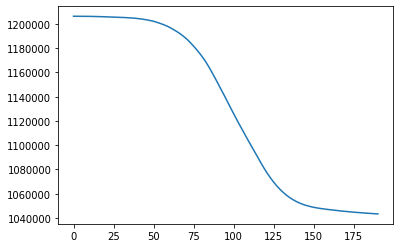

In [10]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(suceptibles) # plotting by columns
#plt.ylim(0,3000000)
#plt.plot(recuperados) # plotting by columns
plt.show()

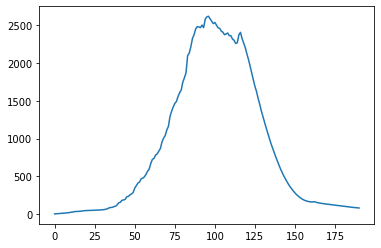

In [9]:
import numpy as np
import matplotlib.pyplot as plt
#plt.plot(suceptibles) # plotting by columns
#plt.ylim(0,3000000)
plt.plot(contagios) # plotting by columns
plt.show()

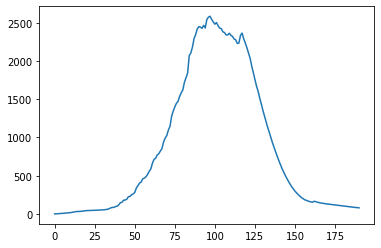

In [11]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(recuperados) # plotting by columns
#plt.ylim(0,3000000)
#plt.plot(contagios) # plotting by columns
plt.show()

In [12]:
print(recuperados)
print(contagios)

[0.00000000e+00 1.00000000e+00 1.68600000e+00 4.19139006e+00
 5.80923785e+00 7.38761781e+00 9.74657323e+00 1.04220809e+01
 1.26808457e+01 1.56728355e+01 1.62361254e+01 2.21924342e+01
 2.34101445e+01 2.98756174e+01 3.09469493e+01 3.12454681e+01
 3.29817362e+01 3.46634724e+01 3.84132492e+01 4.13560573e+01
 4.30852792e+01 4.42953854e+01 4.47981545e+01 4.58134452e+01
 4.61484241e+01 4.71176099e+01 4.87234912e+01 4.96410902e+01
 4.98785451e+01 5.19957715e+01 5.31348019e+01 5.41650057e+01
 5.70378054e+01 6.08239122e+01 6.81423181e+01 7.90855827e+01
 8.44792024e+01 8.55773365e+01 9.69346642e+01 9.96510443e+01
 1.18730723e+02 1.46156904e+02 1.52185082e+02 1.78548916e+02
 1.81900520e+02 1.91089773e+02 2.24465303e+02 2.29679026e+02
 2.48819629e+02 2.61237955e+02 2.80929881e+02 3.38785310e+02
 3.71695110e+02 4.03418953e+02 4.17626268e+02 4.58874684e+02
 4.68388765e+02 4.85183165e+02 5.16067089e+02 5.56603727e+02
 5.86176451e+02 6.60253665e+02 7.12706104e+02 7.26558529e+02
 7.69814619e+02 7.868978